
# Student Performance — End‑to‑End Regression (Exploration → Cleaning → Modeling)

This notebook follows a clean, beginner‑friendly workflow:

1. **Load & Explore** the dataset (shape, dtypes, duplicates, missing values, quick stats).
2. **Visualize**: histograms, boxplots, scatter vs target, **correlation heatmap**.
3. **Preprocess**: numeric scaling + one‑hot encode categoricals using a `ColumnTransformer`.
4. **Model**: train **LinearRegression** with an 80/20 train/test split (`random_state=42`).
5. **Evaluate**: MSE, RMSE, R² + inspect **coefficients** to understand variable influence.

> 🛈 **Dataset**: Download from Kaggle → *Student Performance (Multiple Linear Regression)*.  
> After you download, set the `CSV_PATH` below to your file path (e.g., `data/student_performance.csv`).


In [23]:

import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os as os



In [9]:
print(os.getcwd())  # shows current working directory

c:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_adham


In [10]:
df = pd.read_csv(r"C:\Users\bbuser\Desktop\dataScience-Brain-Bytes\Team_members\from_adham\data\Student_Performance.csv")


In [11]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [13]:
print("Shape:", df.shape)     


Shape: (10000, 6)


In [15]:
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [16]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# List of features
print("Columns:", df.columns.tolist())

Duplicate rows: 127
Columns: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [17]:

summary = df.describe().T
summary["median"] = df.median(numeric_only=True)
print(summary)

                                    count     mean        std   min   25%  \
Hours Studied                     10000.0   4.9929   2.589309   1.0   3.0   
Previous Scores                   10000.0  69.4457  17.343152  40.0  54.0   
Sleep Hours                       10000.0   6.5306   1.695863   4.0   5.0   
Sample Question Papers Practiced  10000.0   4.5833   2.867348   0.0   2.0   
Performance Index                 10000.0  55.2248  19.212558  10.0  40.0   

                                   50%   75%    max  median  
Hours Studied                      5.0   7.0    9.0     5.0  
Previous Scores                   69.0  85.0   99.0    69.0  
Sleep Hours                        7.0   8.0    9.0     7.0  
Sample Question Papers Practiced   5.0   7.0    9.0     5.0  
Performance Index                 55.0  71.0  100.0    55.0  


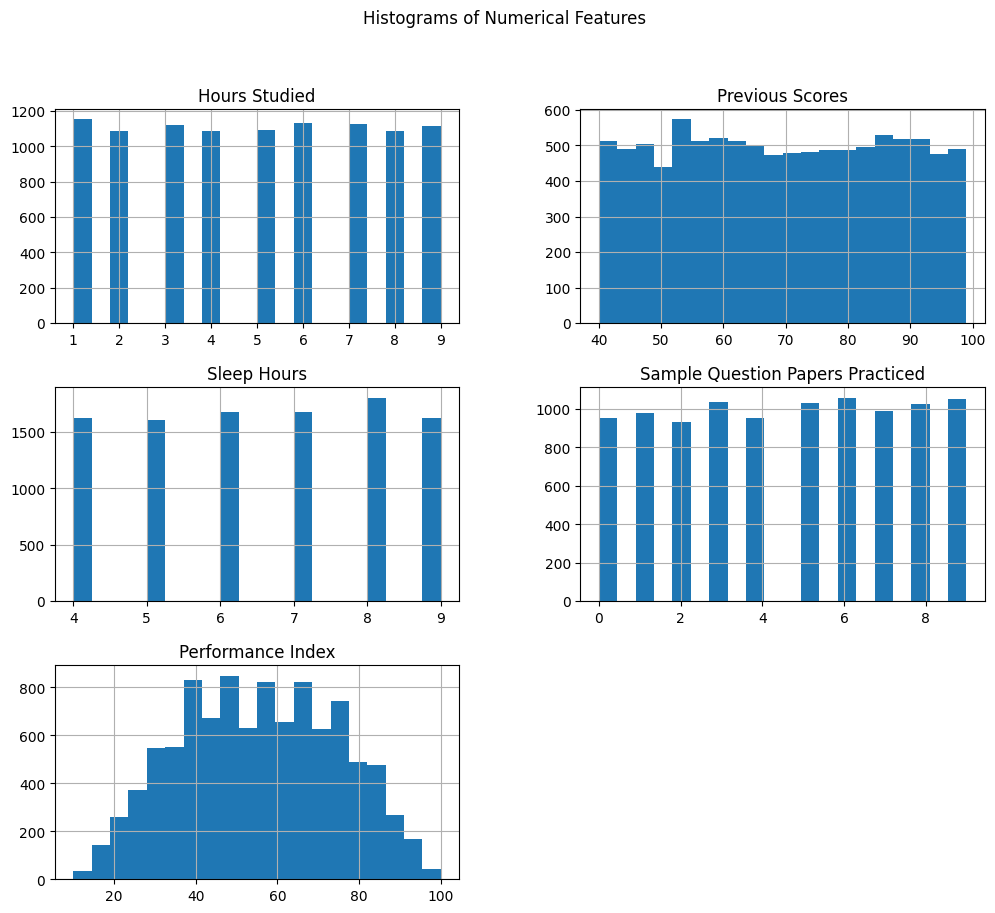

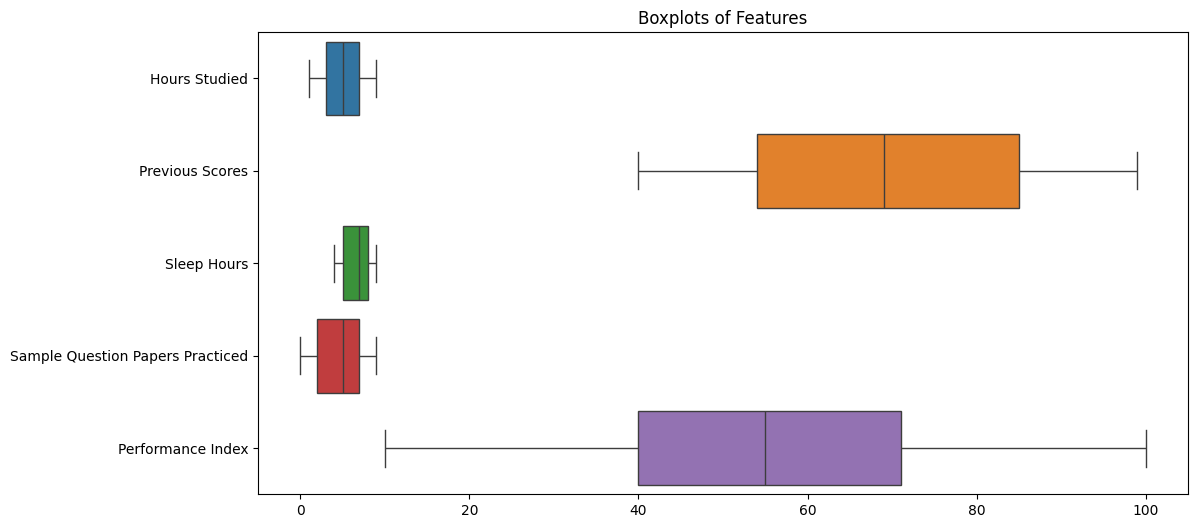

In [19]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots (spot outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Features")
plt.show()

# Scatterplot example: studytime vs final grade (adjust column names if different)
if "studytime" in df.columns and "G3" in df.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x="studytime", y="G3", data=df)
    plt.title("Study Time vs Final Grade")
    plt.show()



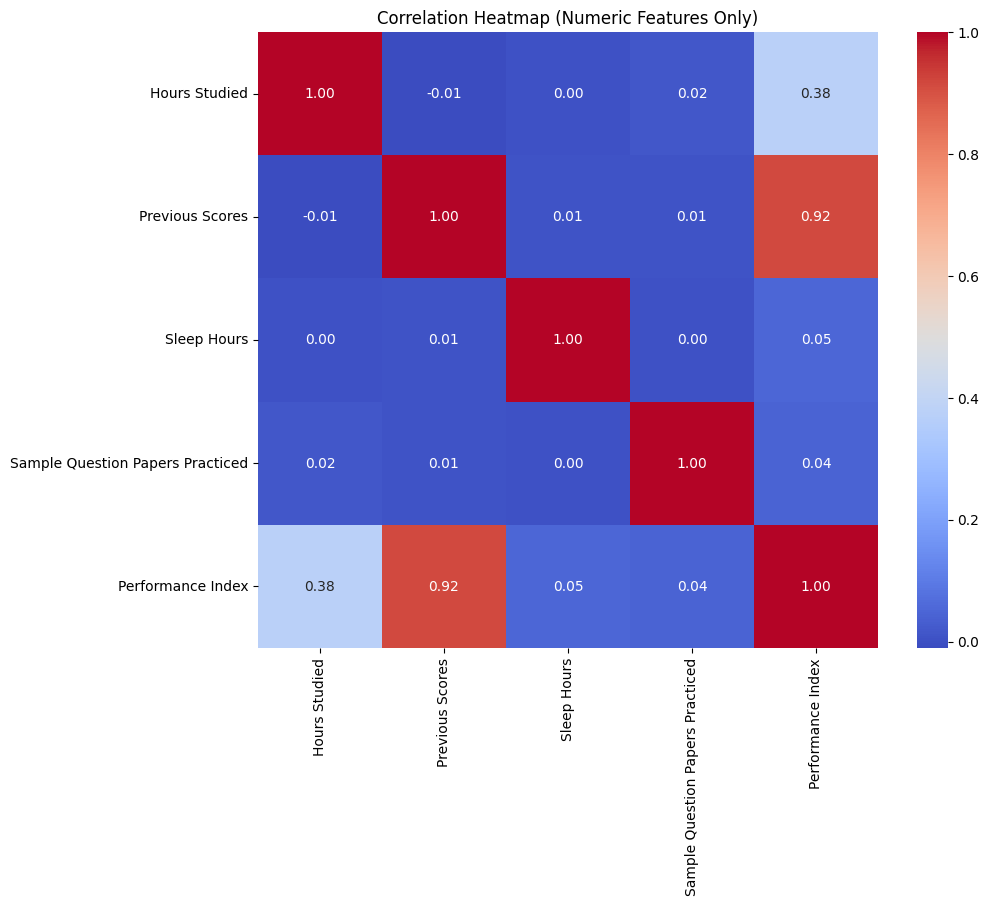

In [28]:
num_df = df.select_dtypes(include=["int64", "float64"])

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [29]:
df1 = pd.get_dummies(df, columns=["Extracurricular Activities"], drop_first=True, dtype=int)

In [30]:
df1

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


In [31]:

target = 'Performance Index'
X = df1.drop(columns=[target])
y = df1[target]
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (9873, 5)
Target shape: (9873,)


In [32]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  
    train_size=0.8, 
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7898, 5)
X_test shape: (1975, 5)
y_train shape: (7898,)
y_test shape: (1975,)


In [34]:

if df1['Extracurricular Activities_Yes'].dtype == 'bool':
    df1['Extracurricular Activities_Yes'] = df1['Extracurricular Activities_Yes'].astype(int)

# 1️⃣ Separate features and target
X = df1.drop(columns=['Performance Index'])
y = df1['Performance Index']

# 2️⃣ Split dataset into training and testing sets (80/20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    train_size=0.8,
    random_state=42
)

# 3️⃣ Initialize Linear Regression model
model = LinearRegression()

# 4️⃣ Train the model
model.fit(X_train, y_train)

# 5️⃣ Optional: check coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# 6️⃣ Optional: make predictions on test set
y_pred = model.predict(X_test)

# 7️⃣ Optional: compare first 5 predictions vs actual
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Model Coefficients: [2.8510219  1.01843034 0.47207329 0.18870366 0.57382297]
Model Intercept: -33.981324496440735
      Actual  Predicted
6099    47.0  46.480013
106     76.0  80.285379
9265    62.0  61.065188
4707    23.0  22.706315
2155    76.0  74.836868


In [35]:
feature_names = X_train.columns

# Get model coefficients
coefficients = model.coef_

# Combine into a DataFrame for easy interpretation
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute impact
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

coef_df

,Feature,Coefficient
0,Hours Studied,2.851022
1,Previous Scores,1.018430
4,Extracurricular Activities_Yes,0.573823
2,Sleep Hours,0.472073
3,Sample Question Papers Practiced,0.188704


In [36]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

# 3️⃣ Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4️⃣ Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# 5️⃣ Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 4.306
Root Mean Squared Error (RMSE): 2.075
R-squared (R²): 0.988
